In [33]:
from model import ConvNN
from initials import generate_u0
from FDM import HeatEquation

import torch
import torch.nn as nn
import numpy as np

from tqdm import tqdm
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [39]:
tmax = 1
nx = 128
ny = 128

In [41]:
model = ConvNN()
solver = HeatEquation(nx=nx, ny=ny)

In [43]:
optimiser = torch.optim.Adam(model.parameters(),lr=1e-4)
criterion = nn.MSELoss()

In [45]:
epochs = 100
equations = 10
batch_size = 64
losses = []

/var/folders/yy/rxmvf4s17q7bwv5swgznj8yr0000gn/T/ipykernel_56551/3043926675.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


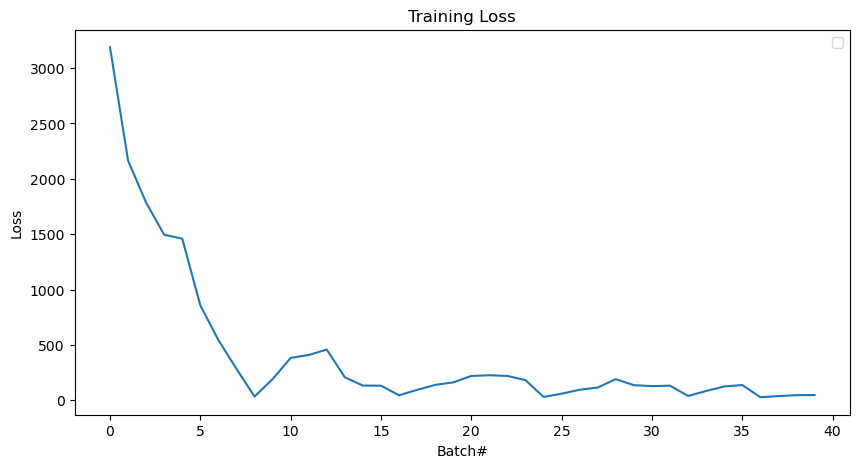

Loss 3188.600342, Loss[0] 3188.600342, Loss[-10] 128.273224


Training on Equation:  25%|█████▊                 | 1/4 [00:02<00:08,  2.93s/it]


KeyboardInterrupt: 

In [47]:
for epoch in range(epochs):
    for eqn in range(equations):
        u0 = generate_u0(nx, ny, 5)
        X = []
        y = []
    
        ut = solver.solve(u0, tmax)
    
        for i in tqdm(range(len(ut)-1), desc="Preparing Training Data"):
            X.append(ut[i])
            y.append(ut[i+1])

        X = torch.FloatTensor(np.array(X)).unsqueeze(1) 
        y = torch.FloatTensor(np.array(y)).unsqueeze(1)

        for i in tqdm(range(0, len(X), batch_size), desc=f"Training on Equation {n}"):
            batch_X = X[i:i+batch_size]
            batch_y = y[i:i+batch_size]
            
            pred = model(batch_X)
            loss = criterion(pred, batch_y)
            
            optimiser.zero_grad()
            loss.backward()
            optimiser.step()
            
            losses.append(loss.item())

    clear_output(wait=True)
    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.xlabel('Batch#')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.show()
    
    print(f'Loss {losses[0]:.6f}, Loss[0] {losses[0]:.6f}, Loss[-10] {losses[-10]:.6f}')